In [1]:
import warnings
import pickle

import awkward as ak
import numpy as np

import hist as hs
from hist.intervals import ratio_uncertainty

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mplhep as hep

plt.style.use(hep.style.CMS)
#plt.style.use('dark_background')

In [27]:
prefix = 'samples/'
fileset = [
    # 'PhiToPiPi',
    prefix + 'PhiToPi0Pi0_mPhi0p3_ctau300',
    prefix + 'PhiToPi0Pi0_mPhi1p0_ctau300',
    prefix + 'PhiToPiPlusPiMinus_mPhi0p3_ctau300',
    prefix + 'PhiToPiPlusPiMinus_mPhi1p0_ctau300',
    'backgroundNew',
    ]

out = {}
for dataset in fileset:
    filename = dataset + '.pickle'
    infile = open(filename, 'rb')
    out[dataset] = pickle.load(infile)
    infile.close()


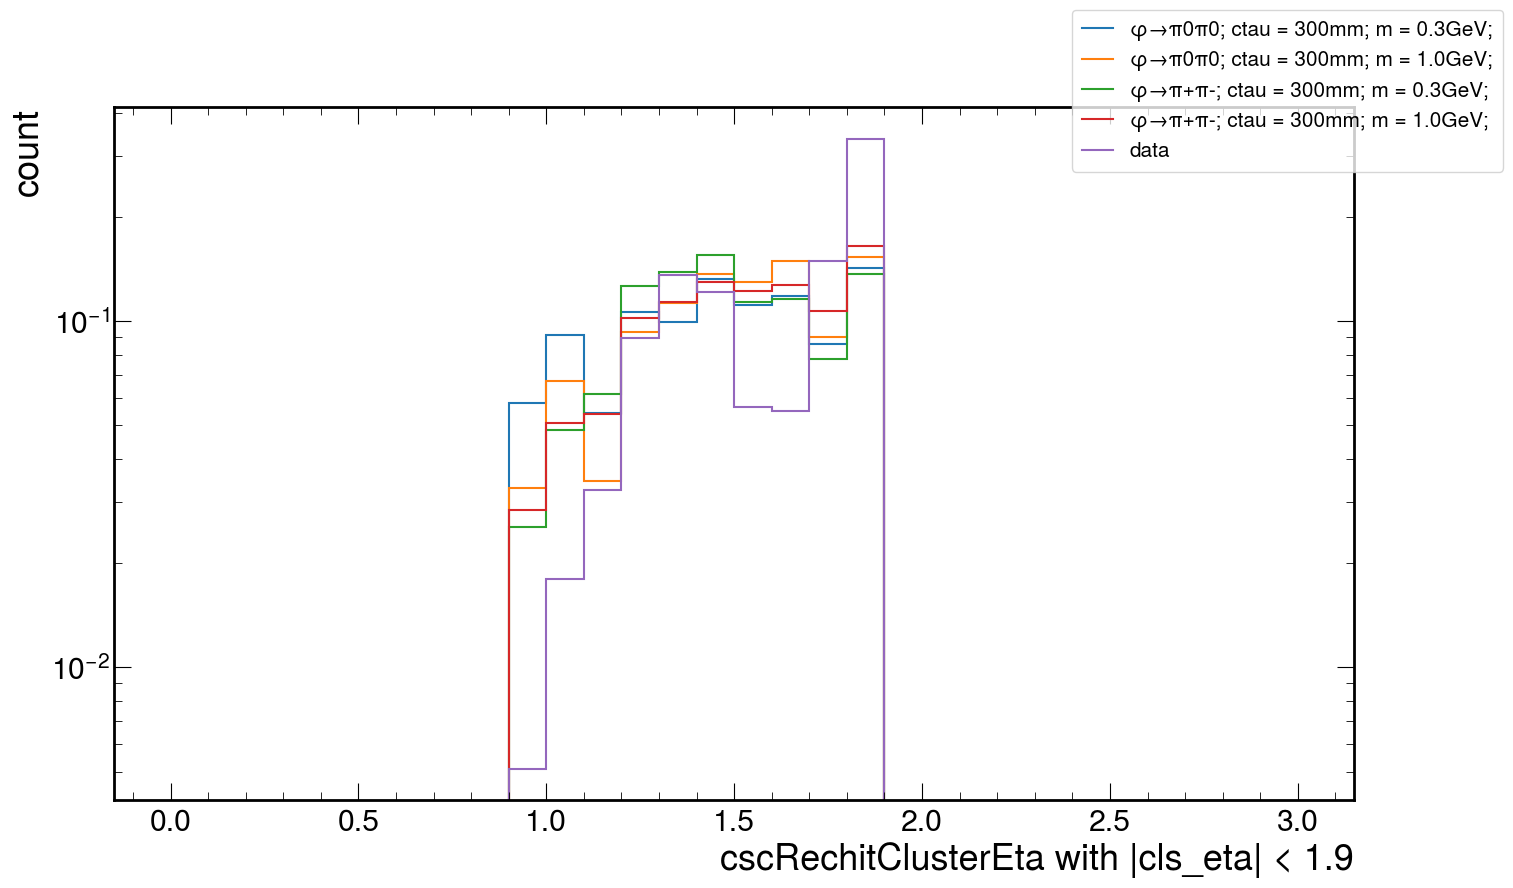

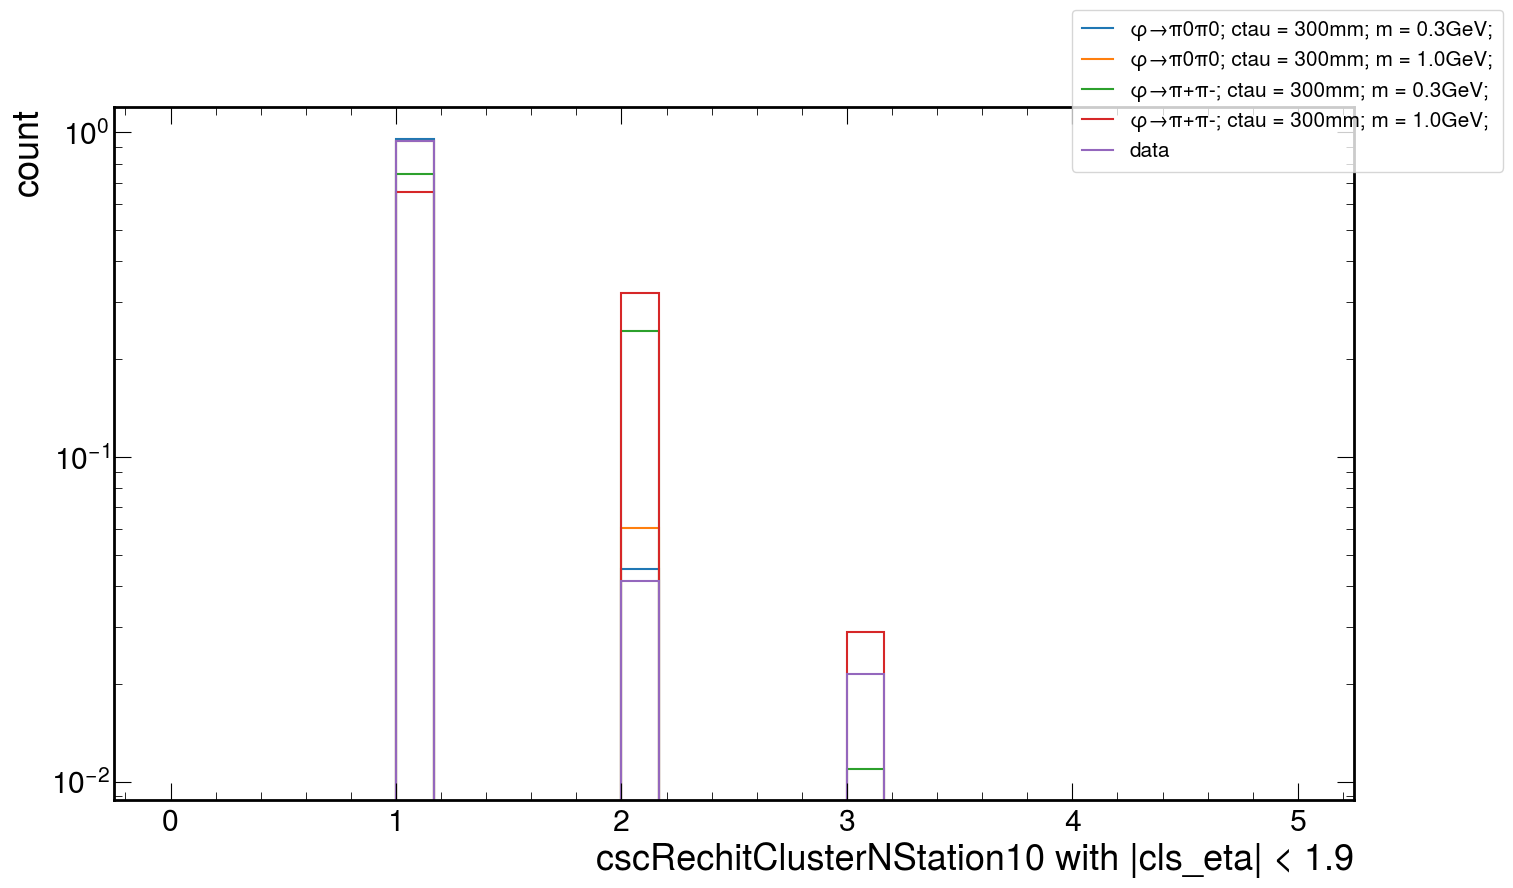

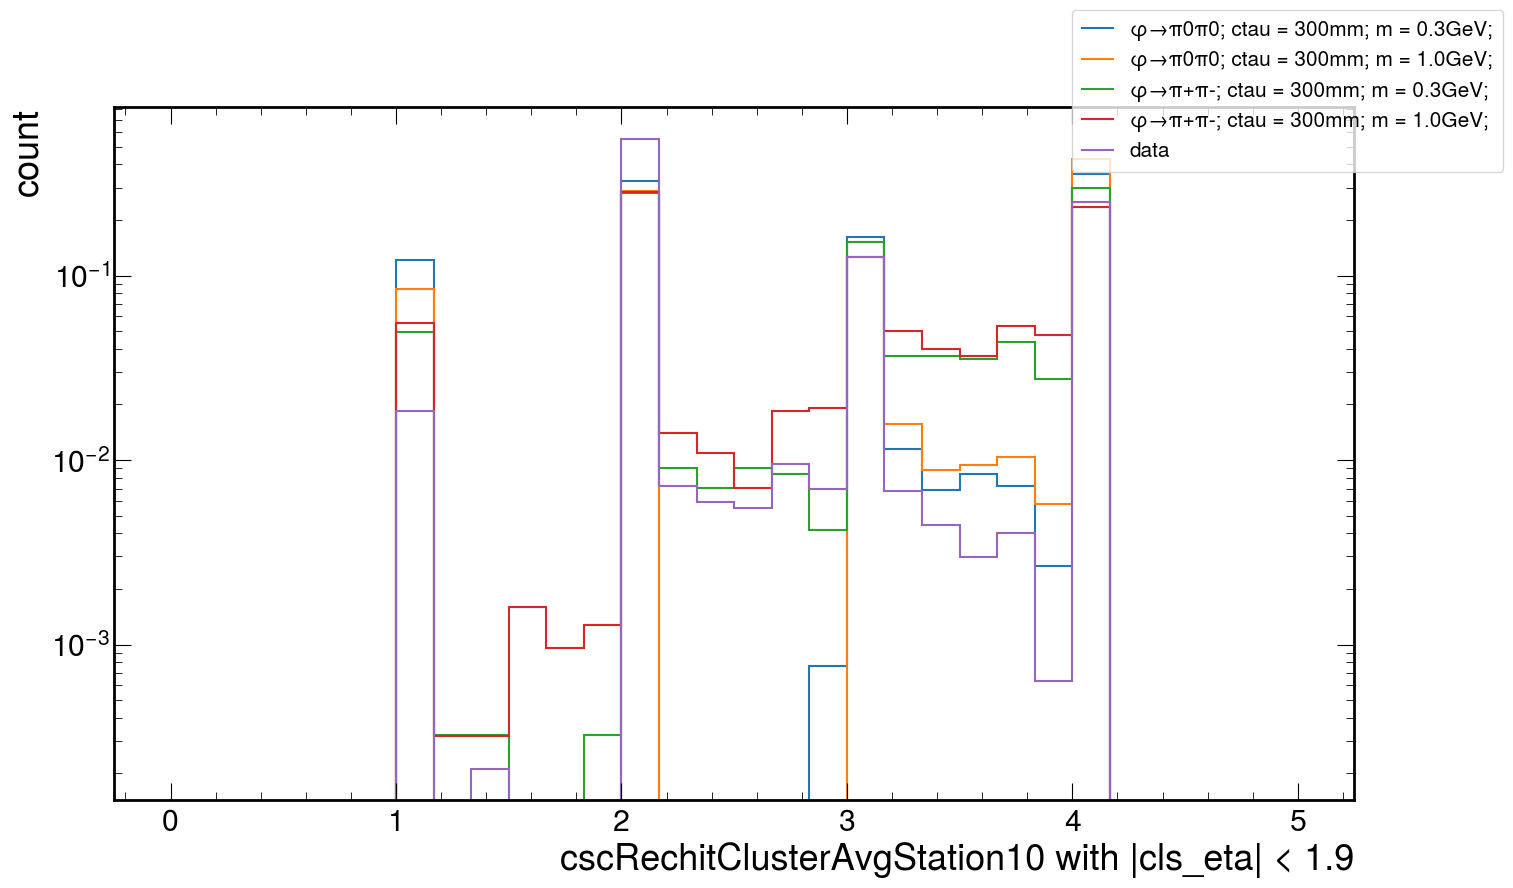

In [28]:
def allsets(var):
    a = 1
    fig, ax = plt.subplots(1,1, figsize = (a*16,a*9))
    for dataset in out:
        title = f'cscRechitCluster{var} with |cls_eta| < 1.9'

        s = ''
        if 'PiPlusPiMinus' in dataset:
            s+='φ→π+π-; '
        if 'Pi0Pi0' in dataset:
            s+='φ→π0π0; '

        if 'ctau1000' in dataset:
            s+='ctau = 1000mm; '
        if 'ctau300' in dataset:
            s+='ctau = 300mm; '

        if '0p3' in dataset:
            s+='m = 0.3GeV;'
        if '1p0' in dataset:
            s+='m = 1.0GeV;'

        if 'PiPi' in dataset:
            s+='φ→π*π* '
        if 'background' in dataset:
            s+='data'

        hep.histplot(out[dataset][title]/out[dataset][title].sum(), label = s, ax = ax)
        ax.set_xlabel(title)
        ax.set_ylabel('count')

        ax.set_yscale('log')

    fig.legend(frameon=True, prop={'size': a*15})
    fig.show()
    
allsets('Eta')
allsets('NStation10')
allsets('AvgStation10')

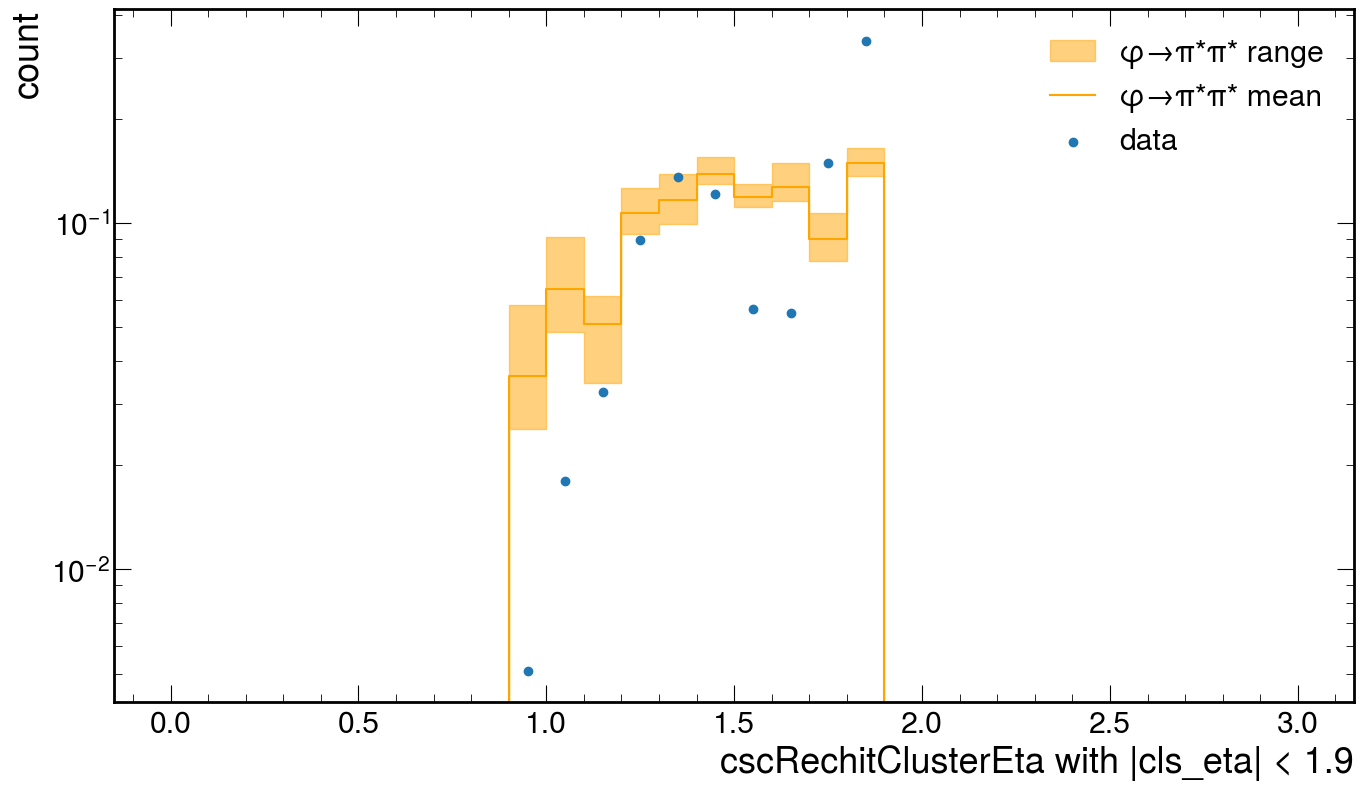

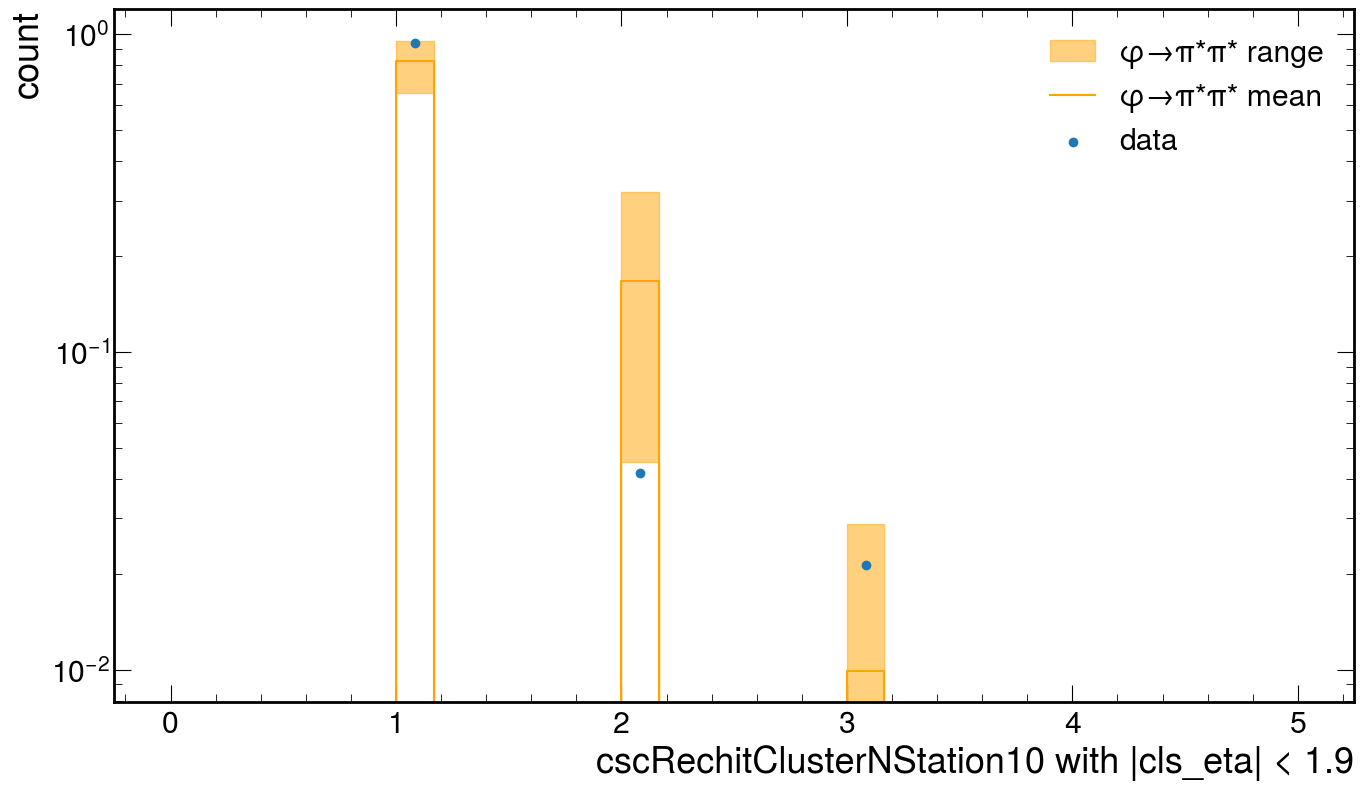

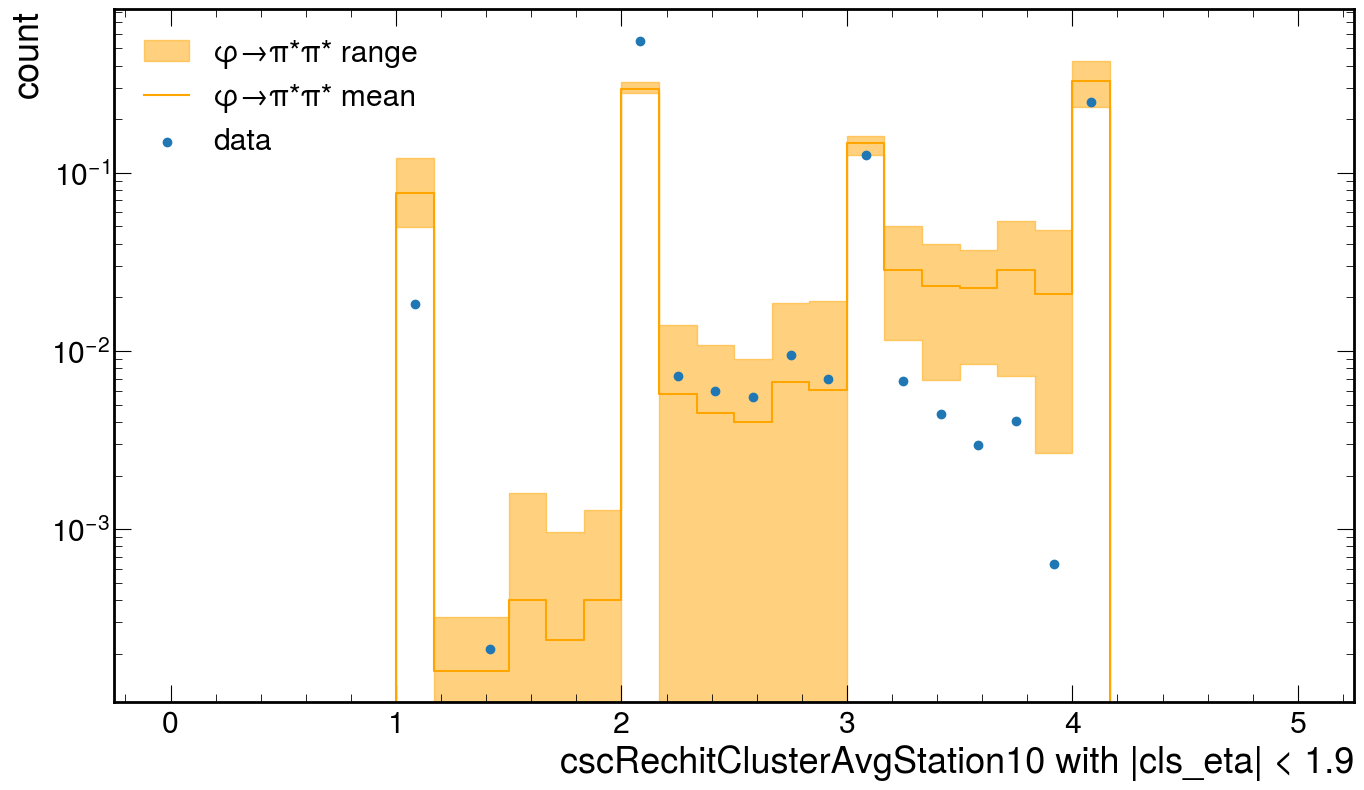

In [171]:
def statsall(var):
    a = 1
    fig, ax = plt.subplots(1,1, figsize = (a*16,a*9))

    title = f'cscRechitCluster{var} with |cls_eta| < 1.9'
    x = out[dataset][title].to_numpy()[1]
    mi = np.min([out[dataset][title]/out[dataset][title].sum() for dataset in fileset if 'background' not in dataset], axis = 0)
    ma = np.max([out[dataset][title]/out[dataset][title].sum() for dataset in fileset if 'background' not in dataset], axis = 0)
    me = np.mean([out[dataset][title]/out[dataset][title].sum() for dataset in fileset if 'background' not in dataset], axis = 0)

    ax.fill_between(np.repeat(x, 2)[1:-1], np.repeat(mi,2), np.repeat(ma,2), alpha = .5, color = 'orange', label = 'φ→π*π* range')
    ax.plot(np.repeat(x,2)[1:-1], np.repeat(me,2), color = 'orange', label = 'φ→π*π* mean')
    ax.scatter(np.convolve(x, np.ones(2), 'valid')/2, (out['backgroundNew'][title]/out['backgroundNew'][title].sum()).view(), label = 'data')



    ax.legend()
    ax.set_xlabel(title)
    ax.set_ylabel('count')
    ax.set_yscale('log')
    
statsall('Eta')
statsall('NStation10')
statsall('AvgStation10')

In [142]:
bins, edges = (out[dataset][title]/out[dataset][title].sum()).to_numpy()

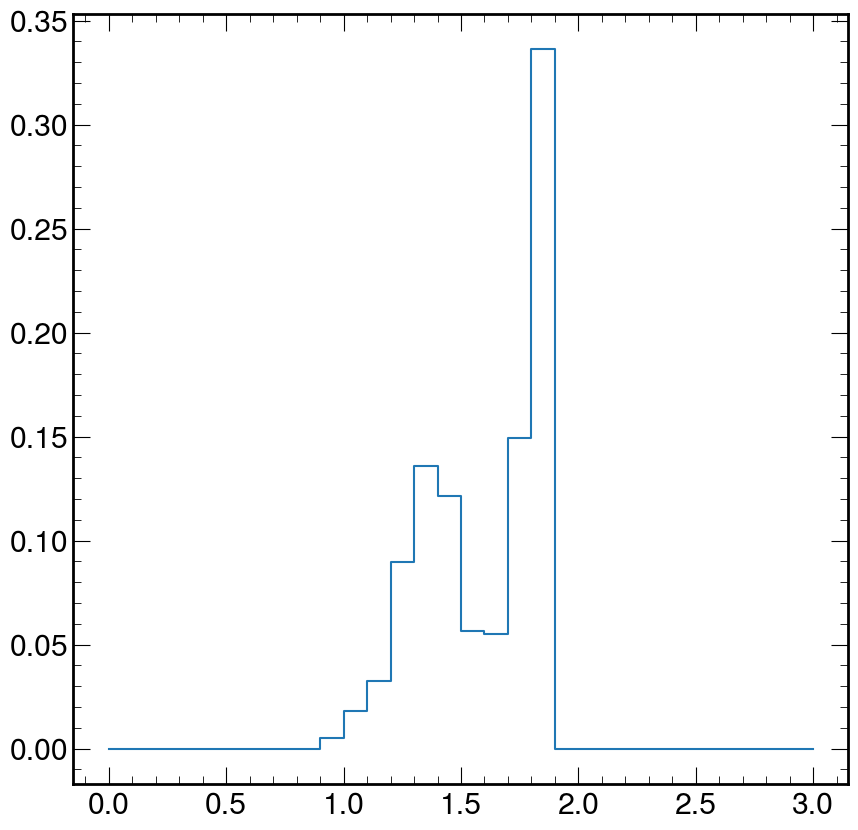

In [143]:
plt.plot(np.repeat(edges, 2)[1:-1], np.repeat(bins, 2))
